In [2]:
# Library import and dataset load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Electric Vehicle Sales.csv")
df.head()


,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [3]:
#Cleaning the data
df['Year'] = df['Year'].astype(int)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df.isnull().sum()
df.duplicated().sum()


np.int64(0)

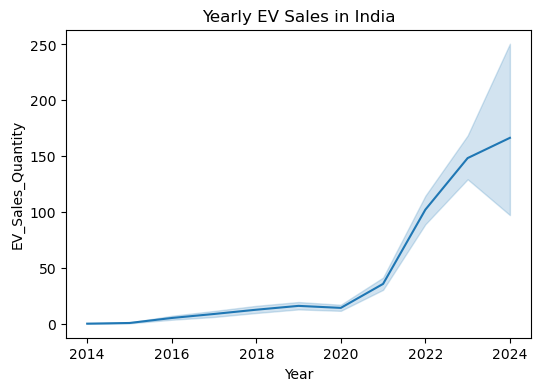

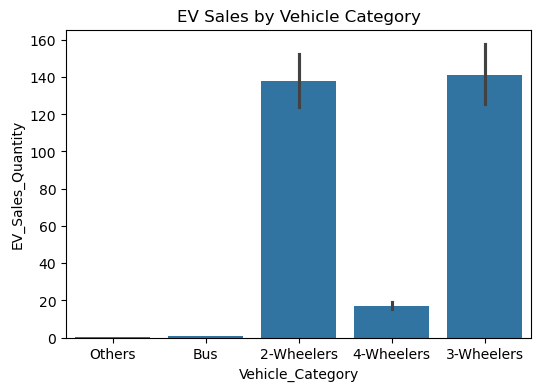

In [5]:
#EDA Process
# 1) For Yearly EV Sales 
plt.figure(figsize=(6,4))
sns.lineplot(x='Year', y='EV_Sales_Quantity', data=df)
plt.title("Yearly EV Sales in India")
plt.show()

# 2) For EV Sales by Vehicle Category
plt.figure(figsize=(6,4))
sns.barplot(x='Vehicle_Category', y='EV_Sales_Quantity', data=df)
plt.title("EV Sales by Vehicle Category")
plt.show()



In [6]:
# Feature Engineering
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df_encoded = pd.get_dummies(
    df,
    columns=['State','Vehicle_Class','Vehicle_Category','Vehicle_Type'],
    drop_first=True
)

df_encoded.drop(['Date','Month_Name'], axis=1, inplace=True)



In [7]:
# Model Building

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df_encoded.drop('EV_Sales_Quantity', axis=1)
y = df_encoded['EV_Sales_Quantity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [8]:
# Evaluation 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


RMSE: 130.58175227721011


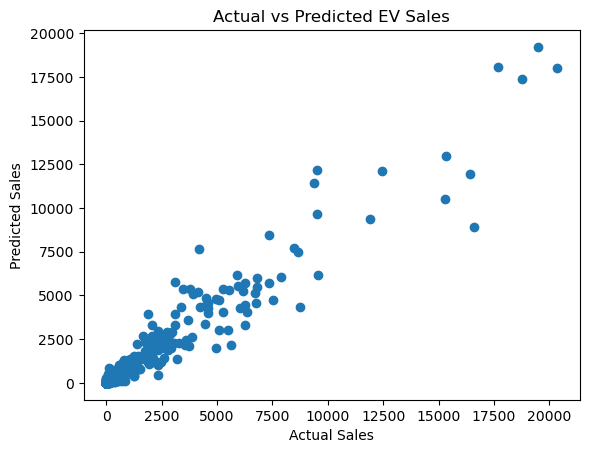

In [9]:
# Prediction through Model
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted EV Sales")
plt.show()
